In [381]:
import pandas as pd

In [382]:
# index = ['QB' , 'RB' , 'WR']
# df = pd.DataFrame({
#     'A': [45, 28, 18],
#     'B': [50, 13, 15]
# }, index=index)

In [383]:
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2022/06-Data%20Munging/01-Fantasy%20Pros%20Projections%20-%20(2022.08.25).csv')
type(df)


pandas.core.frame.DataFrame

In [384]:
df.head()

,Player,Team,Pos,RushingAtt,RushingYds,RushingTD,Receptions,ReceivingYds,ReceivingTD,FL,...,Int,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,YardsAgainst,FieldGoalsMade,FieldGoalsAttempted,ExtraPointsMade
0,Jonathan Taylor,IND,RB,325.4,1600.1,14.8,42.5,354.3,2.0,2.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Derrick Henry,TEN,RB,366.2,1640.1,13.0,27.4,216.0,0.9,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Austin Ekeler,LAC,RB,221.1,984.0,9.4,74.5,665.0,5.3,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Christian McCaffrey,CAR,RB,237.4,1057.4,7.6,88.9,757.9,4.1,1.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Joe Mixon,CIN,RB,287.4,1204.2,9.8,47.1,341.9,2.6,1.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [385]:
', '.join(df.columns)

'Player, Team, Pos, RushingAtt, RushingYds, RushingTD, Receptions, ReceivingYds, ReceivingTD, FL, PassingAtt, PassingCmp, PassingYds, PassingTD, TotalInt, TotalSacks, Int, FumblesRecovered, FumblesForced, DefensiveTDs, SafetysForced, PointsAllowed, YardsAgainst, FieldGoalsMade, FieldGoalsAttempted, ExtraPointsMade'

In [386]:
scoring_weights = {
    'receptions': 1, # PPR
    'receiving_yds': 0.1,
    'receiving_td': 6,
    'FL': -2, #fumbles lost
    'rushing_yds': 0.1,
    'rushing_td': 6,
    'passing_yds': 0.04,
    'passing_td': 4,
    'int': -2
}

df['FantasyPoints'] = (
    df['Receptions']*scoring_weights['receptions'] + df['ReceivingYds']*scoring_weights['receiving_yds'] + \
    df['ReceivingTD']*scoring_weights['receiving_td'] + df['FL']*scoring_weights['FL'] + \
    df['RushingYds']*scoring_weights['rushing_yds'] + df['RushingTD']*scoring_weights['rushing_td'] + \
    df['PassingYds']*scoring_weights['passing_yds'] + df['PassingTD']*scoring_weights['passing_td'] + \
    df['Int']*scoring_weights['int']
    )





In [387]:
# use loc to index certain rows that pertain to the data u wanna see
#rb_df = df.loc[df['Pos'] == 'RB' , ['Player' , 'Team' , 'Receptions', 'ReceivingYds']]
# rb_df.head()

# chain together and typically assorted by ascending value (worse to best)

df.sort_values(by='RushingYds', ascending=False).head()

,Player,Team,Pos,RushingAtt,RushingYds,RushingTD,Receptions,ReceivingYds,ReceivingTD,FL,...,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,YardsAgainst,FieldGoalsMade,FieldGoalsAttempted,ExtraPointsMade,FantasyPoints
1,Derrick Henry,TEN,RB,366.2,1640.1,13.0,27.4,216.0,0.9,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,292.41
0,Jonathan Taylor,IND,RB,325.4,1600.1,14.8,42.5,354.3,2.0,2.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,334.14
5,Dalvin Cook,MIN,RB,276.2,1241.8,9.8,44.9,334.1,1.5,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,265.29
10,Nick Chubb,CLE,RB,247.6,1230.0,8.4,25.3,206.2,1.0,1.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,222.12
4,Joe Mixon,CIN,RB,287.4,1204.2,9.8,47.1,341.9,2.6,1.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,272.91


In [388]:
# transpose makes it look cleaner?????
rb_df = df.loc[df['Pos'] == 'RB']
rb_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RushingAtt,170.0,74.400588,86.359652,0.0,8.125,27.200,130.100,366.20
RushingYds,170.0,327.455294,378.814536,0.0,46.425,142.850,546.500,1640.10
RushingTD,170.0,2.470588,3.014907,0.0,0.325,0.950,3.750,14.80
Receptions,170.0,16.382353,17.428021,0.0,3.925,8.750,25.375,88.90
ReceivingYds,170.0,126.287647,138.582555,0.0,28.900,65.900,194.850,757.90
ReceivingTD,170.0,0.690000,0.881140,0.0,0.100,0.300,1.000,5.30
FL,170.0,0.582941,0.667595,0.0,0.000,0.200,1.000,3.30
PassingAtt,170.0,0.000000,0.000000,0.0,0.000,0.000,0.000,0.00
PassingCmp,170.0,0.000000,0.000000,0.0,0.000,0.000,0.000,0.00
PassingYds,170.0,0.000000,0.000000,0.0,0.000,0.000,0.000,0.00


In [389]:
rb_df['RushingAtt'].max()

366.2

In [390]:
rb_df['RushingAtt'].std()

86.35965218942901

In [391]:
rb_df['RushingAtt'].min()

0.0

In [392]:
rb_df['RushingAtt'].quantile(.60)

53.93999999999997

In [393]:
rb_df['RushingAtt'].quantile(.20)


5.180000000000002

In [394]:
rb_df['RushingTDRank'] = rb_df['RushingTD'].rank(ascending=False)

In [395]:
rb_df.sort_values(by='RushingTDRank')['Player']

0            Jonathan Taylor
1              Derrick Henry
9               James Conner
21             Damien Harris
4                  Joe Mixon
5                Dalvin Cook
2              Austin Ekeler
8          Leonard Fournette
10                Nick Chubb
17              J.K. Dobbins
16           Ezekiel Elliott
6               Alvin Kamara
22               Josh Jacobs
12          Javonte Williams
7               Najee Harris
3        Christian McCaffrey
15          David Montgomery
20           Elijah Mitchell
19                 Cam Akers
18               Breece Hall
13            Saquon Barkley
26             Rashaad Penny
14             D'Andre Swift
32       Rhamondre Stevenson
33         Melvin Gordon III
28                 AJ Dillon
11               Aaron Jones
27          Devin Singletary
29            Antonio Gibson
23             Miles Sanders
25     Clyde Edwards-Helaire
24        Travis Etienne Jr.
36        Brian Robinson Jr.
37            James Robinson
35            

In [396]:
rb_df['RushingAtt'].value_counts()

RushingAtt
0.0      16
2.2       4
4.3       2
4.4       2
3.0       2
11.2      2
4.5       2
114.2     2
25.1      2
65.8      2
18.4      1
17.6      1
20.4      1
7.9       1
20.6      1
26.8      1
325.4     1
12.6      1
26.9      1
15.9      1
28.3      1
16.1      1
20.5      1
5.9       1
22.4      1
37.6      1
27.0      1
30.2      1
7.8       1
17.2      1
24.9      1
27.4      1
24.8      1
36.6      1
41.4      1
45.3      1
45.0      1
12.2      1
22.7      1
21.1      1
9.5       1
13.6      1
8.2       1
2.4       1
8.4       1
5.4       1
4.0       1
4.7       1
5.8       1
16.0      1
8.1       1
10.4      1
12.4      1
11.0      1
9.6       1
13.2      1
5.5       1
6.0       1
16.9      1
15.2      1
2.7       1
5.3       1
17.0      1
20.7      1
20.3      1
18.5      1
14.0      1
3.6       1
15.0      1
15.7      1
47.1      1
21.5      1
32.3      1
47.7      1
366.2     1
189.5     1
239.0     1
214.8     1
219.8     1
204.4     1
178.0     1
184.3     1
183.6

<ipython-input-397-36ef08f3e60a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rb_df['RushingAtt'])


<Axes: xlabel='RushingAtt', ylabel='Density'>

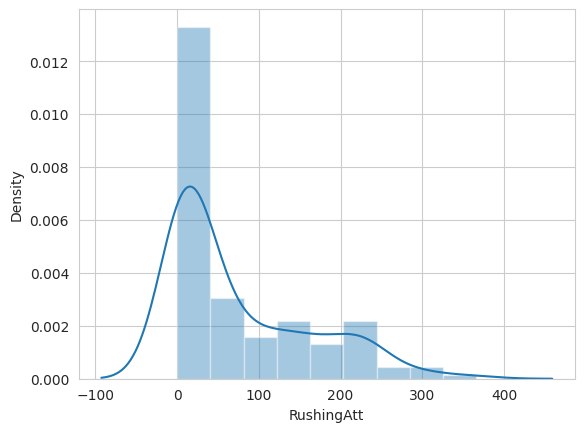

In [397]:
import seaborn as sns
sns.set_style('whitegrid')
sns.distplot(rb_df['RushingAtt'])

In [398]:
rb_df.values



array([['Jonathan Taylor', 'IND', 'RB', ..., 0.0, 334.14, 1.0],
       ['Derrick Henry', 'TEN', 'RB', ..., 0.0, 292.40999999999997, 2.0],
       ['Austin Ekeler', 'LAC', 'RB', ..., 0.0, 324.6, 7.0],
       ...,
       ['Reggie Bonnafon', 'WAS', 'RB', ..., 0.0, 0.0, 163.5],
       ['0', '0', 'RB', ..., 0.0, 0.0, 163.5],
       ['0', '0', 'RB', ..., 0.0, 0.0, 163.5]], dtype=object)

In [399]:
rb_df = df.loc[df['Pos'] == 'RB']

rb_df.head()

,Player,Team,Pos,RushingAtt,RushingYds,RushingTD,Receptions,ReceivingYds,ReceivingTD,FL,...,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,YardsAgainst,FieldGoalsMade,FieldGoalsAttempted,ExtraPointsMade,FantasyPoints
0,Jonathan Taylor,IND,RB,325.4,1600.1,14.8,42.5,354.3,2.0,2.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,334.14
1,Derrick Henry,TEN,RB,366.2,1640.1,13.0,27.4,216.0,0.9,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,292.41
2,Austin Ekeler,LAC,RB,221.1,984.0,9.4,74.5,665.0,5.3,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,324.60
3,Christian McCaffrey,CAR,RB,237.4,1057.4,7.6,88.9,757.9,4.1,1.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,337.83
4,Joe Mixon,CIN,RB,287.4,1204.2,9.8,47.1,341.9,2.6,1.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,272.91


In [400]:
base_columns = ['Player', 'Team', 'Pos']
rushing_columns = ['FantasyPoints', 'Receptions', 'ReceivingYds', 'ReceivingTD', 'RushingAtt', 'RushingYds', 'RushingTD', 'FL']
rb_df = df.loc[(df['Pos'] == 'RB', base_columns + rushing_columns)]

rb_df.head()

,Player,Team,Pos,FantasyPoints,Receptions,ReceivingYds,ReceivingTD,RushingAtt,RushingYds,RushingTD,FL
0,Jonathan Taylor,IND,RB,334.14,42.5,354.3,2.0,325.4,1600.1,14.8,2.3
1,Derrick Henry,TEN,RB,292.41,27.4,216.0,0.9,366.2,1640.1,13.0,2.0
2,Austin Ekeler,LAC,RB,324.60,74.5,665.0,5.3,221.1,984.0,9.4,1.5
3,Christian McCaffrey,CAR,RB,337.83,88.9,757.9,4.1,237.4,1057.4,7.6,1.4
4,Joe Mixon,CIN,RB,272.91,47.1,341.9,2.6,287.4,1204.2,9.8,1.6


In [401]:
adp_df = pd.read_csv("https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2022/06-Data%20Munging/02-ADP%20(PPR)%20-%20(2022.08.23).csv", index_col=0 )

In [402]:
adp_df.head()

,Player,Team,Pos,ESPN,Fantrax,Sleeper,AVG
Rank,,,,,,,
1,Jonathan Taylor,IND,RB,1.0,1.0,1.0,1.0
2,Christian McCaffrey,CAR,RB,2.0,4.0,2.0,3.0
3,Austin Ekeler,LAC,RB,4.0,2.0,4.0,3.0
4,Cooper Kupp,LAR,WR,3.0,3.0,5.0,4.2
5,Derrick Henry,TEN,RB,5.0,6.0,3.0,4.8


In [403]:
adp_df['ADP RANK'] = adp_df['AVG'].rank()

In [404]:
adp_df.head()

,Player,Team,Pos,ESPN,Fantrax,Sleeper,AVG,ADP RANK
Rank,,,,,,,,
1,Jonathan Taylor,IND,RB,1.0,1.0,1.0,1.0,1.0
2,Christian McCaffrey,CAR,RB,2.0,4.0,2.0,3.0,2.5
3,Austin Ekeler,LAC,RB,4.0,2.0,4.0,3.0,2.5
4,Cooper Kupp,LAR,WR,3.0,3.0,5.0,4.2,4.0
5,Derrick Henry,TEN,RB,5.0,6.0,3.0,4.8,5.0


In [405]:
adp_df_cutoff = adp_df[:100]

In [406]:
adp_df_cutoff.shape

(100, 8)

In [407]:
replacement_players = {
    'RB' : '',
    'WR' : '',
    'QB' : '',
    'TE' : '',
}
for _, row in adp_df_cutoff.iterrows():
  position = row['Pos']
  player = row['Player']
  if position in replacement_players:
    replacement_players[position] = player

In [408]:
replacement_players

{'RB': 'Ken Walker III',
 'WR': 'Robert Woods',
 'QB': 'Trey Lance',
 'TE': 'Dawson Knox'}

In [409]:
df = df[['Player' , 'Pos' , 'Team', 'FantasyPoints']]
df.head()


,Player,Pos,Team,FantasyPoints
0,Jonathan Taylor,RB,IND,334.14
1,Derrick Henry,RB,TEN,292.41
2,Austin Ekeler,RB,LAC,324.60
3,Christian McCaffrey,RB,CAR,337.83
4,Joe Mixon,RB,CIN,272.91


In [410]:
# initialize an empty dictionary.
# this is where we are going to save our replacement players

replacement_players = {
    'RB': '',
    'QB': '',
    'WR': '',
    'TE': ''
}

"""

We can iterate over our DataFrame using the iterrows method.

It's similar to the items method for dictionary looping.

Instead of key, values in dict.items(), we get back the index, row in df.items()

Using iterrows, we can iterate over our DataFrame, and get access to each row's column values.

We can access these column value much like we would values in a dictionary, using the [] notation.


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html

"""

for _, row in adp_df_cutoff.iterrows():

    position = row['Pos'] # extract out the position and player value from each row as we loop through it
    player = row['Player']

    if position in replacement_players: # if the position is in the dict's keys
        replacement_players[position] = player # set that player as the replacement player

In [411]:
replacement_players

{'RB': 'Ken Walker III',
 'QB': 'Trey Lance',
 'WR': 'Robert Woods',
 'TE': 'Dawson Knox'}

In [412]:
replacement_values = {} # initialize an empty dictionary

for position, player_name in replacement_players.items():

    player = df.loc[df['Player'] == player_name]

    # because this is a series object we get back, we need to use the tolist method
    # to get back the series as a list. The list object is of length 1, and the 1 item has the value we need.
    # we tack on a [0] to get the value we need.

    replacement_values[position] = player['FantasyPoints'].tolist()[0]

print(replacement_values)

{'RB': 118.25, 'QB': 328.066, 'WR': 200.22, 'TE': 145.09000000000003}


In [413]:
pd.set_option('chained_assignment', None)
df = df.loc[df['Pos'].isin(['QB', 'RB' , 'WR' , 'TE'])]
df['VOR'] = df.apply(
    lambda row: row['FantasyPoints'] - replacement_values.get(row['Pos']), axis = 1
)

In [414]:
# built in that shows all rows
pd.set_option('display.max_rows', None)
df.sort_values(by='VOR', ascending=False).head()

,Player,Pos,Team,FantasyPoints,VOR
3,Christian McCaffrey,RB,CAR,337.83,219.58
0,Jonathan Taylor,RB,IND,334.14,215.89
2,Austin Ekeler,RB,LAC,324.60,206.35
1,Derrick Henry,RB,TEN,292.41,174.16
6,Alvin Kamara,RB,NO,279.54,161.29


In [415]:
df['VOR Rank'] = df['VOR'].rank(ascending=False)
df.sort_values(by='VOR Rank').head()

,Player,Pos,Team,FantasyPoints,VOR,VOR Rank
3,Christian McCaffrey,RB,CAR,337.83,219.58,1.0
0,Jonathan Taylor,RB,IND,334.14,215.89,2.0
2,Austin Ekeler,RB,LAC,324.60,206.35,3.0
1,Derrick Henry,RB,TEN,292.41,174.16,4.0
6,Alvin Kamara,RB,NO,279.54,161.29,5.0


In [416]:
df.groupby('Pos')['VOR'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
QB,92.0,-214.926652,140.651245,-328.066,-319.8085,-312.232,-62.0435,87.208
RB,170.0,-38.695706,86.379125,-118.250,-102.6600,-78.485,6.0300,219.580
TE,142.0,-91.744507,57.018349,-145.090,-130.7500,-115.845,-72.6050,127.060
WR,246.0,-117.704390,83.762582,-200.220,-186.4275,-160.265,-60.5550,158.940


In [417]:
df['VOR'] = df['VOR'].apply(lambda x: (x - df['VOR'].min()) / (df['VOR'].max() - df['VOR'].min()))

In [418]:
df = df.sort_values(by='VOR Rank')
df.head(100)

,Player,Pos,Team,FantasyPoints,VOR,VOR Rank
3,Christian McCaffrey,RB,CAR,337.830,1.000000,1.0
0,Jonathan Taylor,RB,IND,334.140,0.993262,2.0
2,Austin Ekeler,RB,LAC,324.600,0.975842,3.0
1,Derrick Henry,RB,TEN,292.410,0.917063,4.0
6,Alvin Kamara,RB,NO,279.540,0.893563,5.0
170,Cooper Kupp,WR,LAR,359.160,0.889272,6.0
7,Najee Harris,RB,PIT,274.340,0.884067,7.0
4,Joe Mixon,RB,CIN,272.910,0.881456,8.0
5,Dalvin Cook,RB,MIN,265.290,0.867542,9.0
8,Leonard Fournette,RB,TB,263.500,0.864274,10.0


In [419]:
df.groupby('Pos')['VOR'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
QB,92.0,0.206592,0.256829,0.000000,0.015078,0.028913,0.485756,0.758289
RB,170.0,0.528389,0.157728,0.383123,0.411591,0.455734,0.610058,1.000000
TE,142.0,0.431522,0.104115,0.334114,0.360298,0.387515,0.466471,0.831059
WR,246.0,0.384120,0.152950,0.233446,0.258631,0.306404,0.488474,0.889272


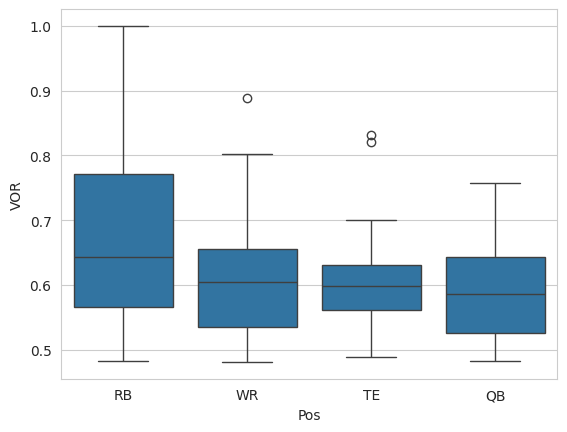

In [420]:
import seaborn as sns
num_teams = 12
num_spots = 16
draft_pool = num_teams * num_spots
df_copy = df[:num_teams*num_spots]


sns.boxplot(x=df_copy['Pos'], y=df_copy['VOR']);

In [421]:
df = df.rename({
    'VOR': 'Value',
    'VOR Rank': 'Value Rank'
}, axis=1)

df.head()

,Player,Pos,Team,FantasyPoints,Value,Value Rank
3,Christian McCaffrey,RB,CAR,337.83,1.000000,1.0
0,Jonathan Taylor,RB,IND,334.14,0.993262,2.0
2,Austin Ekeler,RB,LAC,324.60,0.975842,3.0
1,Derrick Henry,RB,TEN,292.41,0.917063,4.0
6,Alvin Kamara,RB,NO,279.54,0.893563,5.0


In [422]:
adp_df = adp_df.rename({
    'PLAYER': 'Player',
    'POS': 'Pos',
    'AVG': 'Average ADP',
    'ADP RANK': 'ADP Rank'
}, axis=1) # let's rename some columns first.

adp_df = adp_df.drop('Team', axis=1)

In [423]:
df['Player'] = df['Player'].replace({
    'Kenneth Walker III': 'Kenneth Walker',
    'Travis Etienne Jr.': 'Travis Etienne',
    'Brian Robinson Jr.': 'Brian Robinson',
    'Pierre Strong Jr.': 'Pierre Strong',
    'Michael Pittman Jr.': 'Michael Pittman',
    'A.J. Dillon': 'AJ Dillon',
    'D.J. Moore': 'DJ Moore'
})

In [424]:
final_df = df.merge(adp_df, how='left', on=['Player', 'Pos'])

final_df.head(100)

,Player,Pos,Team,FantasyPoints,Value,Value Rank,ESPN,Fantrax,Sleeper,Average ADP,ADP Rank
0,Christian McCaffrey,RB,CAR,337.830,1.000000,1.0,2.0,4.0,2.0,3.0,2.5
1,Jonathan Taylor,RB,IND,334.140,0.993262,2.0,1.0,1.0,1.0,1.0,1.0
2,Austin Ekeler,RB,LAC,324.600,0.975842,3.0,4.0,2.0,4.0,3.0,2.5
3,Derrick Henry,RB,TEN,292.410,0.917063,4.0,5.0,6.0,3.0,4.8,5.0
4,Alvin Kamara,RB,NO,279.540,0.893563,5.0,11.0,20.0,18.0,16.0,15.0
5,Cooper Kupp,WR,LAR,359.160,0.889272,6.0,3.0,3.0,5.0,4.2,4.0
6,Najee Harris,RB,PIT,274.340,0.884067,7.0,8.0,7.0,9.0,7.6,7.0
7,Joe Mixon,RB,CIN,272.910,0.881456,8.0,14.0,10.0,10.0,10.6,10.0
8,Dalvin Cook,RB,MIN,265.290,0.867542,9.0,9.0,8.0,7.0,7.8,8.0
9,Leonard Fournette,RB,TB,263.500,0.864274,10.0,19.0,22.0,25.0,23.2,25.0


In [425]:
# let's calculate the difference between our value rank and adp rank
final_df['Diff in ADP and Value'] = final_df['ADP Rank'] - final_df['Value Rank']

#removing outliers in ADP
final_df = final_df.loc[final_df['ADP Rank'] <= 212]

final_df.head()

,Player,Pos,Team,FantasyPoints,Value,Value Rank,ESPN,Fantrax,Sleeper,Average ADP,ADP Rank,Diff in ADP and Value
0,Christian McCaffrey,RB,CAR,337.83,1.000000,1.0,2.0,4.0,2.0,3.0,2.5,1.5
1,Jonathan Taylor,RB,IND,334.14,0.993262,2.0,1.0,1.0,1.0,1.0,1.0,-1.0
2,Austin Ekeler,RB,LAC,324.60,0.975842,3.0,4.0,2.0,4.0,3.0,2.5,-0.5
3,Derrick Henry,RB,TEN,292.41,0.917063,4.0,5.0,6.0,3.0,4.8,5.0,1.0
4,Alvin Kamara,RB,NO,279.54,0.893563,5.0,11.0,20.0,18.0,16.0,15.0,10.0


In [426]:
draft_pool = final_df.sort_values(by='ADP Rank')[:196]

rb_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'RB']
qb_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'QB']
wr_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'WR']
te_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'TE']

In [427]:
# top 10 RB sleepers for this year's draft
rb_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,ESPN,Fantrax,Sleeper,Average ADP,ADP Rank,Diff in ADP and Value
119,Mark Ingram II,RB,NO,105.79,0.576296,120.0,212.0,193.0,176.0,187.2,190.0,70.0
93,Kenneth Gainwell,RB,PHI,122.96,0.607648,94.0,196.0,136.0,162.0,162.2,157.0,63.0
46,Rhamondre Stevenson,RB,NE,173.24,0.699459,47.0,98.0,95.0,105.0,108.2,103.0,56.0
141,Gus Edwards,RB,BAL,87.36,0.542643,142.0,NaN,160.0,207.0,195.3,196.0,54.0
129,Tyler Allgeier,RB,ATL,98.86,0.563641,130.0,203.0,155.0,160.0,185.0,184.0,54.0
109,Jamaal Williams,RB,DET,116.58,0.595998,110.0,167.0,154.0,188.0,165.4,161.0,51.0
43,Chase Edmonds,RB,MIA,174.14,0.701103,44.0,105.0,88.0,94.0,93.2,93.0,49.0
116,Marlon Mack,RB,HOU,108.42,0.581098,117.0,168.0,194.0,169.0,168.4,166.0,49.0
35,Tony Pollard,RB,DAL,188.44,0.727214,36.0,91.0,86.0,85.0,83.6,84.5,48.5
123,Rachaad White,RB,TB,100.46,0.566563,124.0,NaN,128.0,153.0,175.5,172.0,48.0


In [428]:
# top 10 RB overvalued for this year's draft
rb_draft_pool.sort_values(by='Diff in ADP and Value', ascending=True)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,ESPN,Fantrax,Sleeper,Average ADP,ADP Rank,Diff in ADP and Value
179,Ronald Jones II,RB,KC,59.39,0.491569,180.0,NaN,121.0,154.0,143.5,135.0,-45.0
107,Ken Walker III,RB,SEA,118.25,0.599048,107.5,121.0,89.0,80.0,105.6,100.0,-7.5
19,Nick Chubb,RB,CLE,222.12,0.788714,20.0,26.0,17.0,15.0,18.2,17.0,-3.0
8,Dalvin Cook,RB,MIN,265.29,0.867542,9.0,9.0,8.0,7.0,7.8,8.0,-1.0
1,Jonathan Taylor,RB,IND,334.14,0.993262,2.0,1.0,1.0,1.0,1.0,1.0,-1.0
2,Austin Ekeler,RB,LAC,324.60,0.975842,3.0,4.0,2.0,4.0,3.0,2.5,-0.5
6,Najee Harris,RB,PIT,274.34,0.884067,7.0,8.0,7.0,9.0,7.6,7.0,0.0
3,Derrick Henry,RB,TEN,292.41,0.917063,4.0,5.0,6.0,3.0,4.8,5.0,1.0
0,Christian McCaffrey,RB,CAR,337.83,1.000000,1.0,2.0,4.0,2.0,3.0,2.5,1.5
7,Joe Mixon,RB,CIN,272.91,0.881456,8.0,14.0,10.0,10.0,10.6,10.0,2.0


In [429]:
# top 10 WR sleepers for this year's draft
final_df.sort_values(by='Diff in ADP and Value', ascending=False)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,ESPN,Fantrax,Sleeper,Average ADP,ADP Rank,Diff in ADP and Value
104,Tyler Higbee,TE,LAR,146.15,0.600983,105.0,149.0,281.0,148.0,182.8,183.0,78.0
114,Gerald Everett,TE,LAC,136.89,0.584074,115.0,216.0,177.0,191.0,185.2,185.0,70.0
119,Mark Ingram II,RB,NO,105.79,0.576296,120.0,212.0,193.0,176.0,187.2,190.0,70.0
93,Kenneth Gainwell,RB,PHI,122.96,0.607648,94.0,196.0,136.0,162.0,162.2,157.0,63.0
96,Noah Fant,TE,SEA,148.60,0.605457,97.0,146.0,198.0,170.0,160.8,154.0,57.0
125,Evan Engram,TE,JAC,127.05,0.566107,126.0,188.0,164.0,205.0,182.2,182.0,56.0
46,Rhamondre Stevenson,RB,NE,173.24,0.699459,47.0,98.0,95.0,105.0,108.2,103.0,56.0
129,Tyler Allgeier,RB,ATL,98.86,0.563641,130.0,203.0,155.0,160.0,185.0,184.0,54.0
141,Gus Edwards,RB,BAL,87.36,0.542643,142.0,NaN,160.0,207.0,195.3,196.0,54.0
91,Hunter Henry,TE,NE,151.45,0.610661,92.0,124.0,249.0,144.0,154.2,146.0,54.0


In [430]:
# top 10 WR overvalued for this year's draft
wr_draft_pool.sort_values(by='Diff in ADP and Value', ascending=True)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,ESPN,Fantrax,Sleeper,Average ADP,ADP Rank,Diff in ADP and Value
332,Romeo Doubs,WR,GB,90.40,0.398517,333.0,199.0,191.0,182.0,192.0,192.5,-140.5
273,Christian Watson,WR,GB,104.42,0.424117,274.0,207.0,151.0,145.0,176.8,174.5,-99.5
279,Jameson Williams,WR,DET,102.72,0.421013,280.0,218.0,147.0,166.0,188.6,191.0,-89.0
200,Skyy Moore,WR,KC,132.43,0.475263,201.0,130.0,140.0,113.0,142.8,134.0,-67.0
147,DeAndre Hopkins,WR,ARI,165.74,0.536087,148.0,95.0,105.0,77.0,85.2,86.0,-62.0
169,Chris Olave,WR,NO,148.94,0.505410,170.0,114.0,108.0,101.0,116.2,112.0,-58.0
166,Garrett Wilson,WR,NYJ,151.21,0.509555,167.0,112.0,110.0,108.0,124.6,118.0,-49.0
184,DJ Chark Jr.,WR,DET,140.17,0.489396,185.0,160.0,146.0,177.0,147.0,138.0,-47.0
128,DeVonta Smith,WR,PHI,181.73,0.565285,129.0,85.0,79.0,87.0,86.8,87.0,-42.0
135,Drake London,WR,ATL,178.89,0.560099,136.0,89.0,92.0,82.0,96.2,95.0,-41.0


In [431]:
# top 10 TE sleepers for this year's draft
te_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,ESPN,Fantrax,Sleeper,Average ADP,ADP Rank,Diff in ADP and Value
104,Tyler Higbee,TE,LAR,146.15,0.600983,105.0,149.0,281.0,148.0,182.8,183.0,78.0
114,Gerald Everett,TE,LAC,136.89,0.584074,115.0,216.0,177.0,191.0,185.2,185.0,70.0
96,Noah Fant,TE,SEA,148.60,0.605457,97.0,146.0,198.0,170.0,160.8,154.0,57.0
125,Evan Engram,TE,JAC,127.05,0.566107,126.0,188.0,164.0,205.0,182.2,182.0,56.0
91,Hunter Henry,TE,NE,151.45,0.610661,92.0,124.0,249.0,144.0,154.2,146.0,54.0
113,David Njoku,TE,CLE,138.51,0.587032,114.0,156.0,157.0,171.0,165.8,162.0,48.0
132,Robert Tonyan,TE,GB,124.56,0.561560,133.0,206.0,171.0,193.0,179.0,179.0,46.0
126,Albert Okwuegbunam,TE,DEN,126.95,0.565924,127.0,190.0,158.0,120.0,168.4,166.0,39.0
118,Irv Smith Jr.,TE,MIN,132.87,0.576734,119.0,161.0,134.0,152.0,161.8,156.0,37.0
102,Cole Kmet,TE,CHI,147.13,0.602773,103.0,132.0,126.0,117.0,136.4,129.0,26.0


In [432]:
# top 10 TE overvalued for this year's draft
te_draft_pool.sort_values(by='Diff in ADP and Value', ascending=True)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,ESPN,Fantrax,Sleeper,Average ADP,ADP Rank,Diff in ADP and Value
54,George Kittle,TE,SF,189.71,0.680524,55.0,43.0,47.0,36.0,41.6,39.0,-16.0
45,Kyle Pitts,TE,ATL,200.09,0.699477,46.0,34.0,34.0,30.0,33.8,33.0,-13.0
106,Dawson Knox,TE,BUF,145.09,0.599048,107.5,115.0,111.0,89.0,98.8,96.0,-11.5
70,T.J. Hockenson,TE,DET,166.83,0.638745,71.0,64.0,71.0,61.0,66.8,64.0,-7.0
13,Travis Kelce,TE,KC,272.15,0.831059,14.0,17.0,13.0,13.0,14.4,13.0,-1.0
44,Darren Waller,TE,LV,200.22,0.699715,45.0,42.0,49.0,40.0,44.6,44.0,-1.0
52,Dalton Schultz,TE,DAL,193.85,0.688083,53.0,57.0,67.0,56.0,60.0,56.0,3.0
16,Mark Andrews,TE,BAL,266.66,0.821034,17.0,20.0,21.0,23.0,21.2,22.0,5.0
66,Dallas Goedert,TE,PHI,171.95,0.648094,67.0,79.0,87.0,74.0,76.0,73.0,6.0
97,Pat Freiermuth,TE,PIT,148.48,0.605238,98.0,110.0,144.0,104.0,115.2,110.0,12.0


In [433]:
# top 10 QB sleepers for this year's draft
qb_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,ESPN,Fantrax,Sleeper,Average ADP,ADP Rank,Diff in ADP and Value
152,Ryan Tannehill,QB,TEN,290.520,0.530489,153.0,179.0,141.0,213.0,172.6,169.0,16.0
71,Tom Brady,QB,TB,349.030,0.637328,72.0,69.0,90.0,78.0,80.4,78.0,6.0
176,Mac Jones,QB,NE,272.700,0.497949,177.0,173.0,168.0,187.0,178.6,178.0,1.0
73,Dak Prescott,QB,DAL,345.290,0.630499,74.0,68.0,78.0,88.0,76.4,74.0,0.0
207,Baker Mayfield,QB,CAR,256.072,0.467587,208.0,193.0,213.0,211.0,208.8,206.0,-2.0
178,Jameis Winston,QB,NO,270.920,0.494699,179.0,177.0,183.0,175.0,178.0,176.0,-3.0
63,Jalen Hurts,QB,PHI,362.292,0.661544,64.0,56.0,73.0,66.0,64.8,60.0,-4.0
173,Matt Ryan,QB,IND,274.418,0.501086,174.0,172.0,165.0,189.0,169.4,168.0,-6.0
28,Josh Allen,QB,BUF,415.274,0.758289,29.0,21.0,26.0,22.0,21.8,23.0,-6.0
154,Trevor Lawrence,QB,JAC,289.072,0.527845,155.0,144.0,133.0,167.0,155.0,147.0,-8.0


In [434]:
# top 10 QB overvalued for this year's draft
qb_draft_pool.sort_values(by='Diff in ADP and Value', ascending=True)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,ESPN,Fantrax,Sleeper,Average ADP,ADP Rank,Diff in ADP and Value
574,Deshaun Watson,QB,CLE,128.786,0.235163,575.0,186.0,209.0,173.0,178.2,177.0,-398.0
117,Russell Wilson,QB,DEN,316.354,0.577661,118.0,78.0,83.0,73.0,81.4,80.0,-38.0
85,Joe Burrow,QB,CIN,336.504,0.614455,86.0,72.0,64.0,53.0,62.0,57.0,-29.0
159,Justin Fields,QB,CHI,284.634,0.519741,160.0,153.0,122.0,151.0,141.6,133.0,-27.0
110,Aaron Rodgers,QB,GB,324.884,0.593237,111.0,66.0,104.0,92.0,83.6,84.5,-26.5
130,Derek Carr,QB,LV,308.666,0.563623,131.0,113.0,114.0,111.0,111.8,106.0,-25.0
56,Justin Herbert,QB,LAC,369.338,0.674410,57.0,36.0,43.0,34.0,36.0,35.0,-22.0
60,Lamar Jackson,QB,BAL,365.330,0.667092,61.0,44.0,53.0,46.0,47.0,47.0,-14.0
143,Tua Tagovailoa,QB,MIA,296.140,0.540751,144.0,142.0,125.0,146.0,139.8,132.0,-12.0
41,Patrick Mahomes II,QB,KC,384.668,0.702403,42.0,29.0,41.0,32.0,32.4,31.0,-11.0
